In [1]:
from collections import Counter
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

# Problem 1

In [4]:
def load_file(path):
    with open(path,'r') as f:
        a = f.readlines()
    return a

def make_histogram_data(text, normalize=True):
    # lower text
    clean_text = text.lower()
    # remove numbers, whitespaces, punctuation and etc 
    clean_text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?^rt|\s", "", clean_text)
    # turn string to list of chars
    letters = list(clean_text)
    # count letter occurrences
    letter_counts = Counter(letters)
    # create a dataframe
    df = pd.DataFrame.from_dict(letter_counts, orient="index").T
    # sort from a to z
    df = df.reindex(sorted(df.columns), axis=1)
    df = df.T
    # name the column
    df["Unnormalized"] = df[0]
    df.drop(columns=[0], inplace=True)
    # add normalized data
    if normalize: df["Normalized"] = df["Unnormalized"]/df["Unnormalized"].sum()
    return df

def plot_bar_histogram(df,text):
    # Horizontally stacked subplots
    fig, axs = plt.subplots(1, len(df.columns))
    fig.suptitle(text, fontsize=16)
    for i, ax in enumerate(axs):
        ax.bar(df.index, df[df.columns[i]],)
        ax.set_title(df.columns[i])
    
    return axs

def main(text_path = "text.txt"):
    raw_text = load_file(text_path)
    for text in raw_text:
        # print(text)
        data = make_histogram_data(text, normalize=True)
        # data.plot(kind='bar', subplots=True)
        plot_bar_histogram(data, text)


/tmp/ipykernel_2675/1715582873.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, len(df.columns))


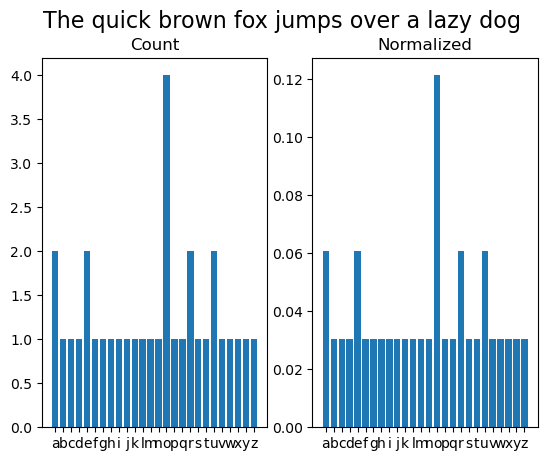

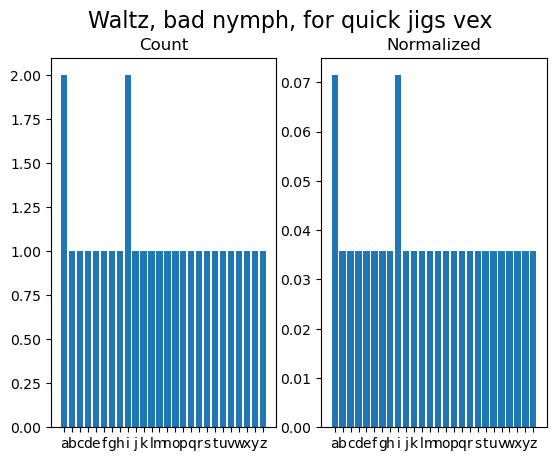

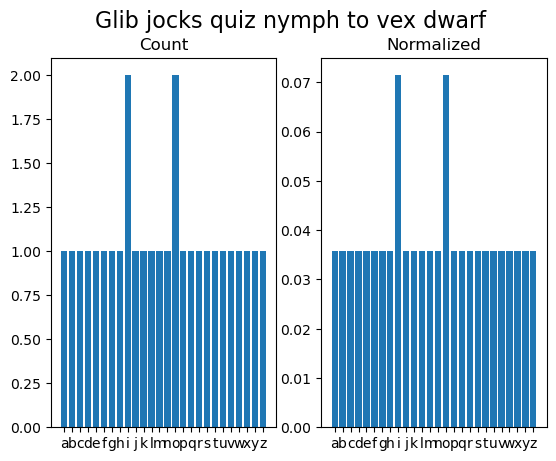

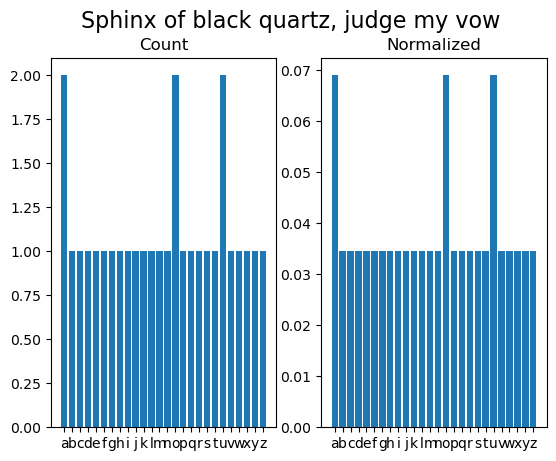

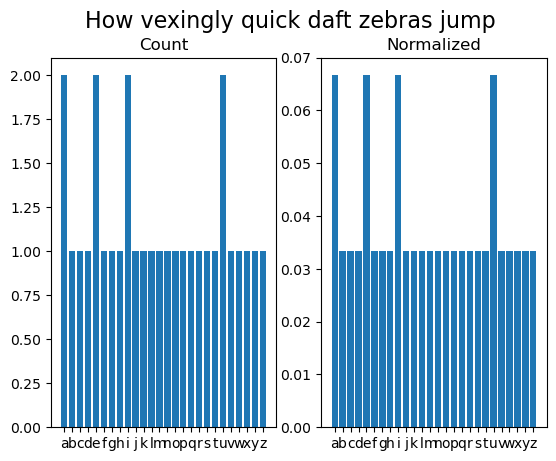

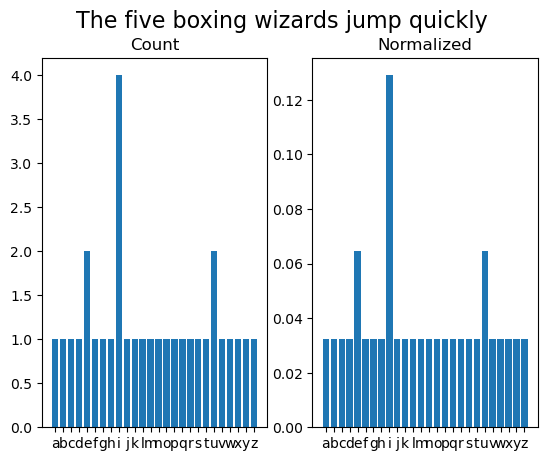

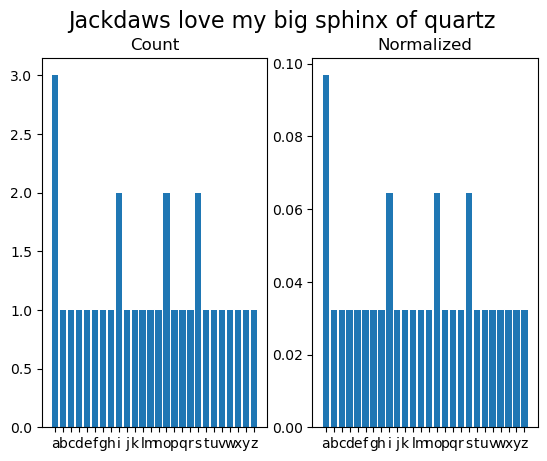

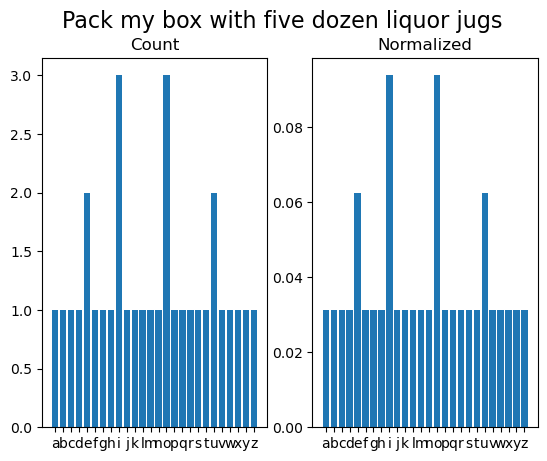

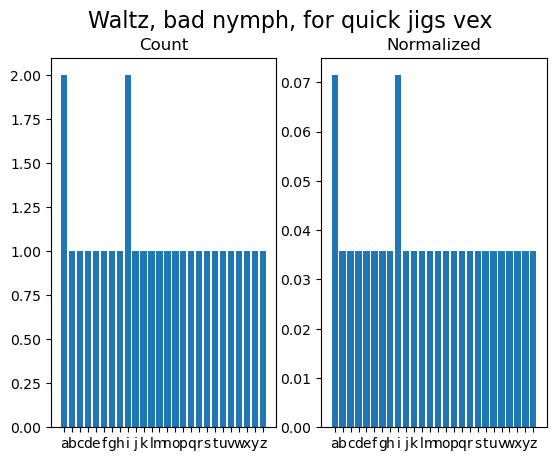

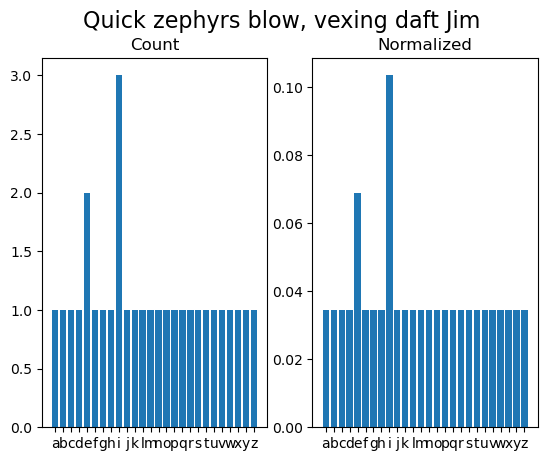

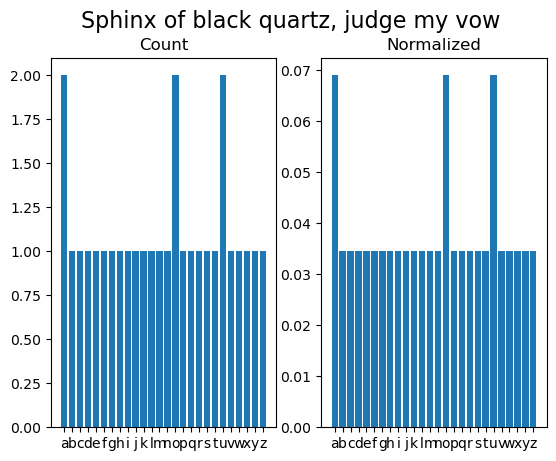

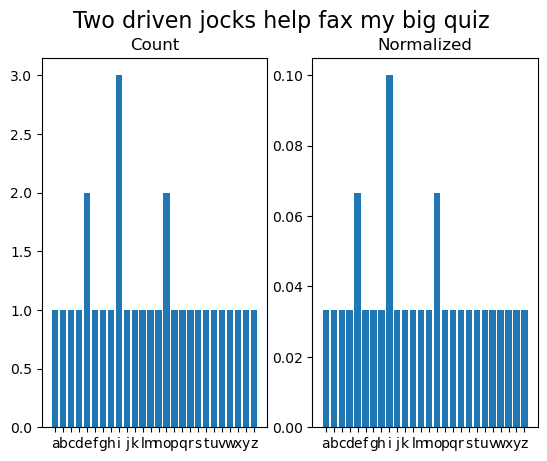

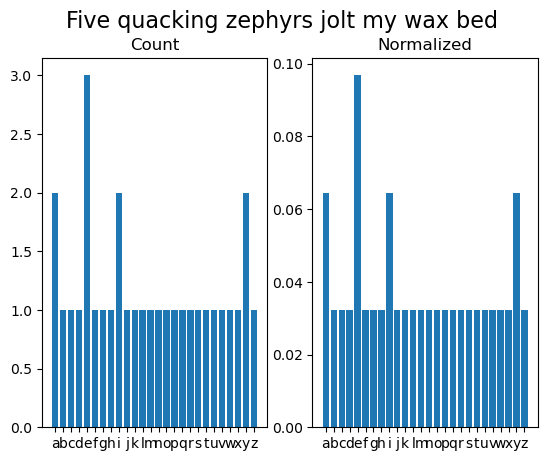

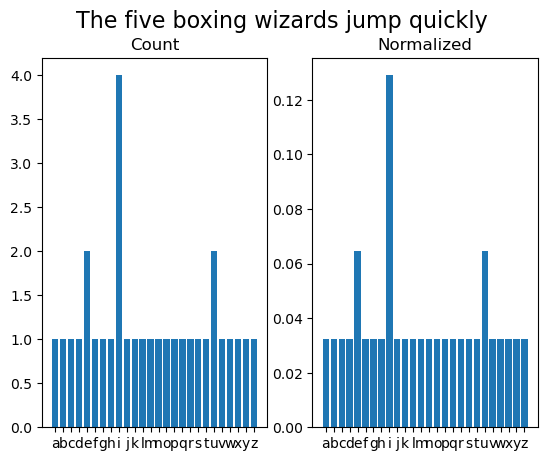

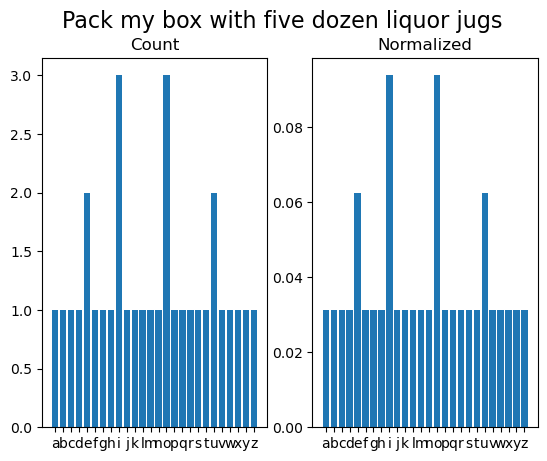

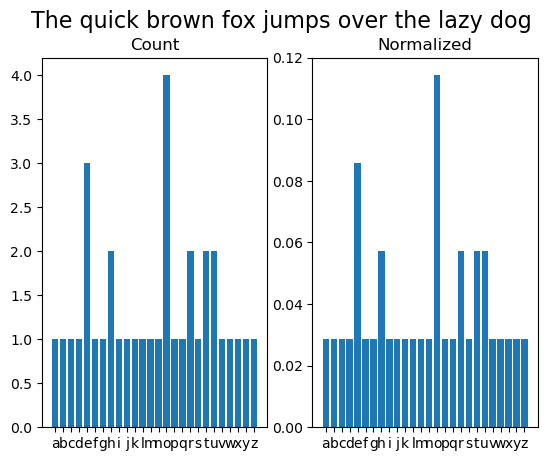

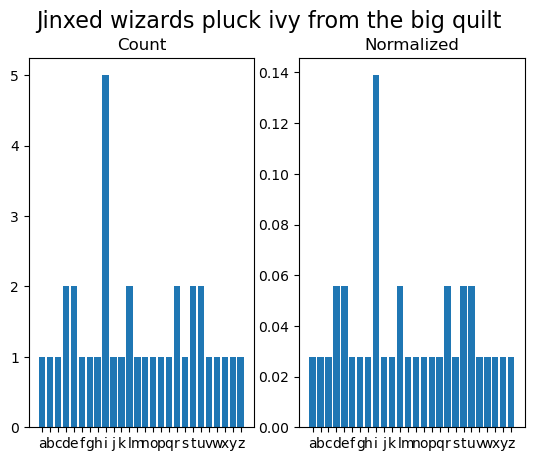

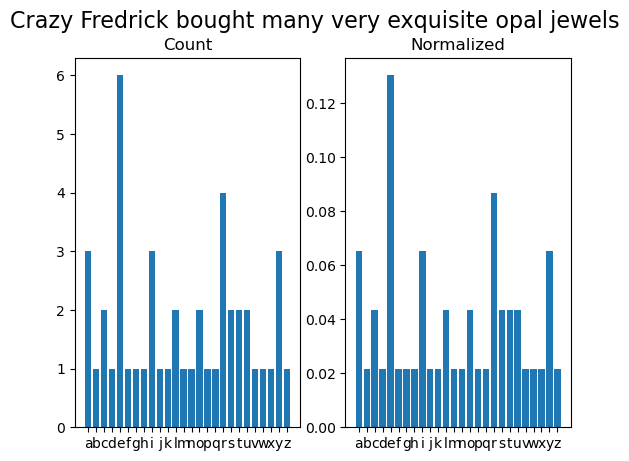

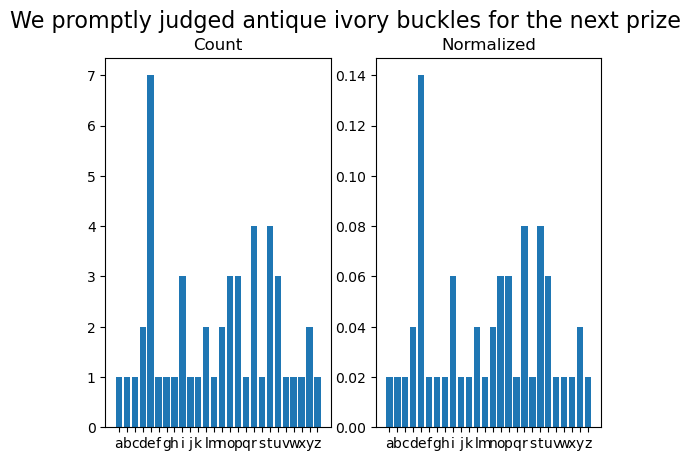

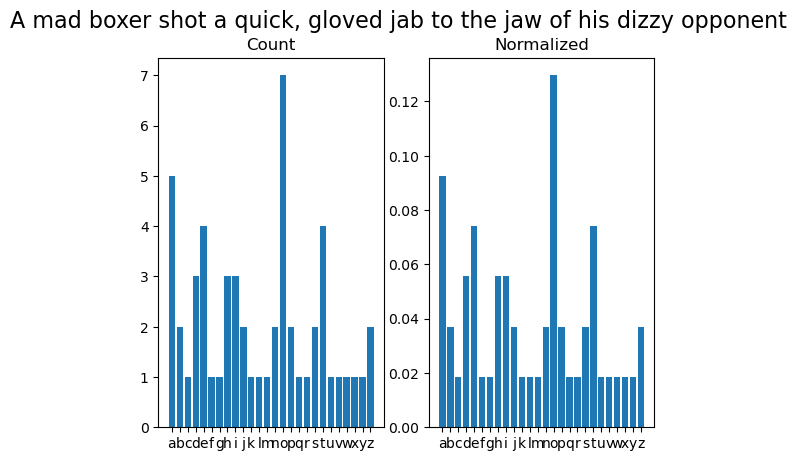

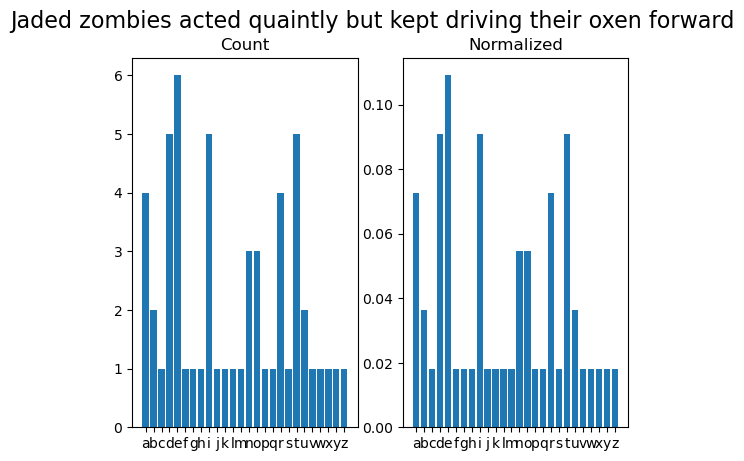

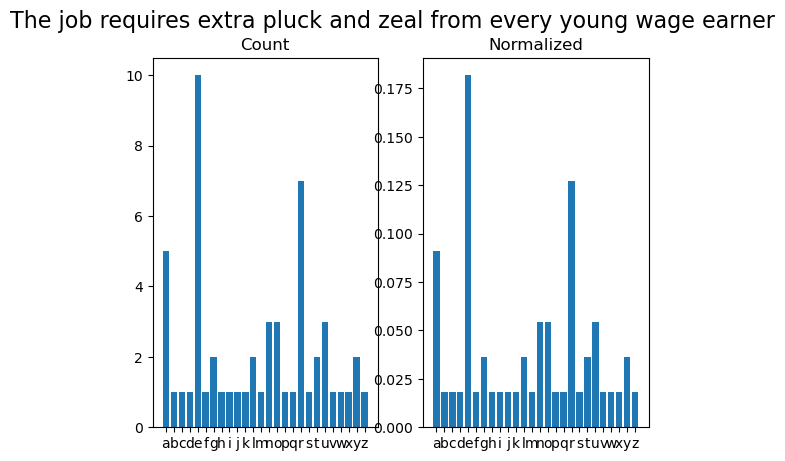

In [5]:
main()

# Problem 2

In [106]:
def open_img(path):
    img = cv2.imread('test.png',  cv2.IMREAD_COLOR)
    return img

def plot_img(img, dis="image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(dis)
    plt.show()

def pixel_wise_eudclidean_distance(pixel1, pixel2):
    dist = np.linalg.norm(pixel1-pixel2)
    return dist

def solve1(path="./test.png"):
    
    compare_pixels = [[255,0,0],[0,255,0],[0,0,255]]
    
    img = open_img(path)
    # print(f"Original Image Size: {img.shape}")
    plot_img(img)
    rows,cols,_ = img.shape
    new_img = img.copy()
        
    for i in range(rows):
        for j in range(cols):
            pixel = img[i,j]
            new_img[i,j] = compare_pixels[np.argmin([pixel_wise_eudclidean_distance(pixel, px) for px in compare_pixels])]
            
    plot_img(new_img)
    
    cv2.imwrite("output1.png",new_img)
    
def solve2(path="./test.png", width_lenght=50, height_lenght=50):
    
    img = open_img(path)
    # print(f"Original Image Size: {img.shape}")
    # plot_img(img)
    height, width,_ = img.shape
    new_img = img.copy()
    
    center_height = (height//2)-(square_lenght//2)
    center_width = (width//2)-(width_lenght//2)
    
    print(f"y_cente:{center_height}, x_center:{center_width}")
    
    new_img[center_height : center_height+height_lenght,
            center_width : center_width+width_lenght,
           ]=np.zeros(shape=(height_lenght,width_lenght,3))
    
    plot_img(new_img)
    
    cv2.imwrite("output2.png",new_img)

def main(path="test.png", width_lenght=50, height_lenght=50):
    solve1(path=path)
    solve2(path=path, width_lenght=width_lenght,
           height_lenght=height_lenght)
            
    


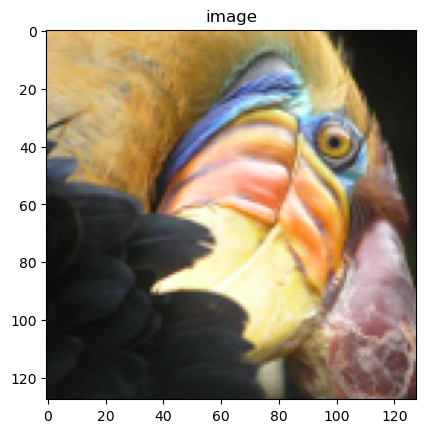

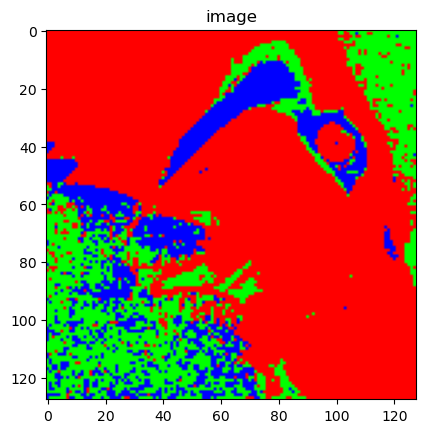

y_cente:39, x_center:39


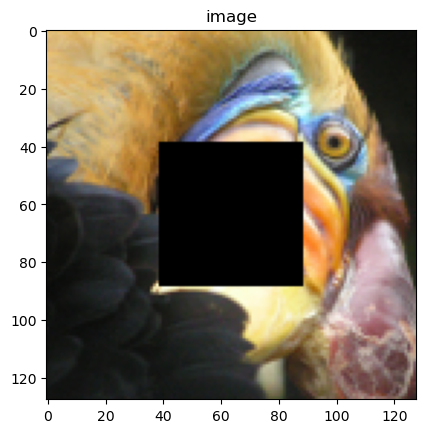

In [107]:
main()

# Problem 3
\begin{equation}
\begin{cases}
3ta+3bu=11.25\\
4ta+2bu=10.00\end{cases}
\Longrightarrow Ax = b \Longrightarrow 
\begin{bmatrix}
3 & 3 \\
4 & 2 \\
\end{bmatrix}
\begin{bmatrix}
ta \\
bu \\
\end{bmatrix}
= \begin{bmatrix}
11.25 \\
10.00 \\
\end{bmatrix}
\end{equation}

In [109]:
A = np.array([[3, 3], [4, 2]])
b = np.array([11.25, 10])
x = np.linalg.solve(A, b)
x

array([1.25, 2.5 ])